<a href="https://colab.research.google.com/github/FathimaNazarudeen/s3./blob/main/h.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
! /content/drive/MyDrive/autism

/bin/bash: /content/drive/MyDrive/autism: Is a directory


In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras import regularizers
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)

In [32]:
train_dir="/content/drive/MyDrive/fathima/train"
val_dir="/content/drive/MyDrive/fathima/valid"

In [33]:
train_data=train_datagen.flow_from_directory(train_dir, target_size=(224, 224), class_mode='binary', batch_size=1,seed=42)
valid_data=valid_datagen.flow_from_directory(val_dir, target_size=(224, 224), class_mode='binary',batch_size=1,seed=42)

Found 2636 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [34]:
model_1=tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(filters=32,
                                                           kernel_size=3,
                                                           activation="relu",
                                                           input_shape=(224,224,3)),
                                    tf.keras.layers.Conv2D(32,3,activation="relu",kernel_regularizer=regularizers.l1(0.0001)),
                                    tf.keras.layers.MaxPool2D(pool_size=2,),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.MaxPool2D(pool_size=2,
                                                              padding="valid"),
                                    tf.keras.layers.Conv2D(64,3,activation="relu",kernel_regularizer=regularizers.l1(0.0001)),
                                    tf.keras.layers.MaxPool2D(pool_size=2,),
                                    tf.keras.layers.Conv2D(64,3,activation="relu",kernel_regularizer=regularizers.l1(0.0001)),
                                    tf.keras.layers.MaxPool2D(pool_size=2,),
                                    tf.keras.layers.MaxPool2D(2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(256),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(1,activation="sigmoid")])

In [35]:
model_1.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.SGD(),metrics=["accuracy"])

In [36]:
model_1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 conv2d_16 (Conv2D)          (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 110, 110, 32)     0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 110, 110, 32)      0         
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 55, 55, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 53, 53, 64)       

In [37]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20)

In [38]:
model=model_1.fit(train_data,epochs=500,validation_data=valid_data,steps_per_epoch=50,callbacks=[callback])

Epoch 1/500
50/50 [==============================] - 2s 34ms/step - loss: 0.9726 - accuracy: 0.4600 - val_loss: 0.9500 - val_accuracy: 0.5000
Epoch 2/500
50/50 [==============================] - 1s 17ms/step - loss: 0.9638 - accuracy: 0.5200 - val_loss: 0.9485 - val_accuracy: 0.5000
Epoch 3/500
50/50 [==============================] - 1s 17ms/step - loss: 0.9548 - accuracy: 0.4000 - val_loss: 0.9486 - val_accuracy: 0.5000
Epoch 4/500
50/50 [==============================] - 1s 18ms/step - loss: 0.9518 - accuracy: 0.5000 - val_loss: 0.9491 - val_accuracy: 0.5000
Epoch 5/500
50/50 [==============================] - 1s 17ms/step - loss: 0.9549 - accuracy: 0.4800 - val_loss: 0.9472 - val_accuracy: 0.5000
Epoch 6/500
50/50 [==============================] - 1s 17ms/step - loss: 0.9370 - accuracy: 0.6000 - val_loss: 0.9534 - val_accuracy: 0.5000
Epoch 7/500
50/50 [==============================] - 1s 17ms/step - loss: 0.9513 - accuracy: 0.5200 - val_loss: 0.9505 - val_accuracy: 0.5000
Epoch 

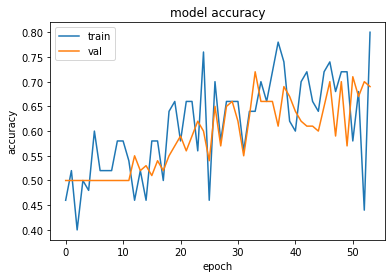

In [39]:
import matplotlib.pyplot as plt
import keras
from matplotlib import pyplot as plt
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

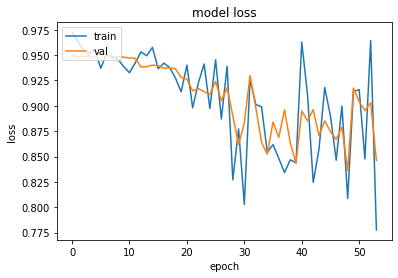

In [40]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')

plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [41]:
from tensorflow.keras.preprocessing import image

In [42]:
def predictImage(filename):
  img1=image.load_img(filename,target_size=(224,224))
  plt.imshow(img1)
  Y=image.img_to_array(img1)
  X=np.expand_dims(Y,axis=0)
  val=model_1.predict(X)
  val=str(val)
  print(val)
  #print(val[[0]])
  if val=="[[1. 0.]]":
    plt.xlabel("autism",fontsize=30)
  elif val=="[[0. 1.]]":
    plt.xlabel("not autism",fontsize=30)


1/1 [==============================] - 0s 73ms/step
[[0.99772495]]


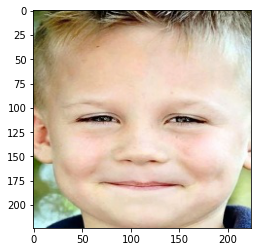

In [43]:
predictImage("/content/drive/MyDrive/autism/Autism/test/non_autistic/005.jpg")

In [48]:
AlexNet = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(224,224,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same", kernel_regularizer=regularizers.l1(0.0001)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same", kernel_regularizer=regularizers.l1(0.0001)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same", kernel_regularizer=regularizers.l1(0.0001)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same", kernel_regularizer=regularizers.l1(0.0001)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

In [49]:
AlexNet.compile(loss='binary_crossentropy', optimizer=tf.optimizers.SGD(lr=0.001), metrics=['accuracy'])
AlexNet.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 54, 54, 96)        34944     
                                                                 
 batch_normalization_25 (Bat  (None, 54, 54, 96)       384       
 chNormalization)                                                
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 26, 26, 96)       0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 26, 26, 256)       614656    
                                                                 
 batch_normalization_26 (Bat  (None, 26, 26, 256)      1024      
 chNormalization)                                                
                                                      

In [50]:
history_2=AlexNet.fit(train_data,
                      epochs=100,
                      
                      validation_data=valid_data,
                       callbacks=[callback]
                      )

Epoch 1/100
2636/2636 [==============================] - 36s 13ms/step - loss: 7.3050 - accuracy: 0.5781 - val_loss: 6.4309 - val_accuracy: 0.6100
Epoch 2/100
2636/2636 [==============================] - 34s 13ms/step - loss: 6.2894 - accuracy: 0.6032 - val_loss: 6.1918 - val_accuracy: 0.5900
Epoch 3/100
2636/2636 [==============================] - 35s 13ms/step - loss: 6.0754 - accuracy: 0.6529 - val_loss: 6.0043 - val_accuracy: 0.5900
Epoch 4/100
2636/2636 [==============================] - 33s 13ms/step - loss: 5.9208 - accuracy: 0.6806 - val_loss: 5.9687 - val_accuracy: 0.6300
Epoch 5/100
2636/2636 [==============================] - 34s 13ms/step - loss: 5.8011 - accuracy: 0.6950 - val_loss: 5.8357 - val_accuracy: 0.5900
Epoch 6/100
2636/2636 [==============================] - 34s 13ms/step - loss: 5.6805 - accuracy: 0.7178 - val_loss: 5.8211 - val_accuracy: 0.6100
Epoch 7/100
2636/2636 [==============================] - 34s 13ms/step - loss: 5.5668 - accuracy: 0.7299 - val_loss: 5

In [51]:
def predictImage(filename):
  img1=image.load_img(filename,target_size=(224,224))
  plt.imshow(img1)
  Y=image.img_to_array(img1)
  X=np.expand_dims(Y,axis=0)
  val=AlexNet.predict(X)
  val=str(val)
  print(val)
  #print(val[[0]])
  if val=="[[0. 1.]]":
    plt.xlabel("autism",fontsize=30)
  elif val=="[[1. 0.]]":
    plt.xlabel("not autism",fontsize=30)


1/1 [==============================] - 0s 118ms/step
[[0.]]


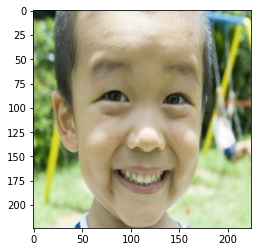

In [52]:
predictImage("/content/drive/MyDrive/autism/Autism/test/non_autistic/008.jpg")